<img src="images/ie-logo.png" width="250" height="250" align="right">

# AI - ML & Analytics

## Session 2: House Price Prediction

<img src="images/banner.png" width="800" height="800" align="center">

### Introduction:

This notebook will help us warm up / refresh our knowledge on Machine Learning and Analytics. You will need to have a working environment with the necessary libraries installed in order to do the task.

### Task: Practical example of ML for Real State investment prediction

In this exercise we provide you with a dataset [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf). You are required to do the following tasks:

**1)** The first thing you need to do is to upload the dataset. The dataset is located in the folder `/data/`.

**2)** Do a simple EDA to figure out what attributes you have, how good they are and what could be a first hint of good features.

**3)** Create a model.

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

### 1. Load the Ames dataset

Every ML approach starts with a defined Question. We need data to answer that question. With this data (if it happens to be good enough) we can apply a ML process and train an algorithm.

<img src="images/ML.png" width="800" height="800" align="center">

Load the dataset located in `data/dataset.csv` and have a quick view of it to get a grasp.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from pandas.api.types import is_object_dtype, is_bool_dtype
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error

In [5]:
#Your code here
data = pd.read_csv('data/dataset.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [9]:
data.shape

(1460, 81)

In [10]:
data.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

The data contains a set of different **features** (numerical and categorical) and a target variable **SalePrice**. 

The goal of the ML process is, **using the provided data**, to be able to create a model for the **SalePrice** as a function of the **features**, that is:
    
$$
SalePrice = F (features)
$$

In [11]:
# have a look at the description of that dataset
! cat data/data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

### 2. Exploratory Data Analysis (EDA) or data pre-processing

The goal of EDA is to understand the data and see if we can answer our question with that data. 

EDA usually involves:

- Univariable study: learn about each feature with a focus on the dependent variable ('SalePrice').
- Multivariate study: understand how the dependent variable and independent variables relate.
- Basic cleaning: clean the dataset and handle missing data, outliers and categorical variables.
- Transform the variables if needed: test normality hypothesis etc.

In [13]:
#Your analysis here
features = ProfileReport(data, minimal=True)
features

Summarize dataset:   0%|          | 0/89 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
cleaned_data = data.drop(['Id','Street','Utilities','Heating','Condition2','LowQualFinSF','PoolQC','MiscVal','MoSold', 'MiscFeature'], 1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [48]:
cleaned_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,...,61,0,0,0,0,NaN,2008,WD,Normal,208500
1,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,0,NaN,2007,WD,Normal,181500
2,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,...,42,0,0,0,0,NaN,2008,WD,Normal,223500
3,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,Crawfor,...,35,272,0,0,0,NaN,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,NoRidge,...,84,0,0,0,0,NaN,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,NaN,Reg,Lvl,Inside,Gtl,Gilbert,...,40,0,0,0,0,NaN,2007,WD,Normal,175000
1456,20,RL,85.0,13175,NaN,Reg,Lvl,Inside,Gtl,NWAmes,...,0,0,0,0,0,MnPrv,2010,WD,Normal,210000
1457,70,RL,66.0,9042,NaN,Reg,Lvl,Inside,Gtl,Crawfor,...,60,0,0,0,0,GdPrv,2010,WD,Normal,266500
1458,20,RL,68.0,9717,NaN,Reg,Lvl,Inside,Gtl,NAmes,...,0,112,0,0,0,NaN,2010,WD,Normal,142125


In [49]:
cleaned_data.isnull().sum().sort_values(ascending=False)

Alley          1369
Fence          1179
GarageYrBlt      81
MasVnrType        8
MasVnrArea        8
               ... 
GrLivArea         0
2ndFlrSF          0
1stFlrSF          0
CentralAir        0
MSSubClass        0
Length: 71, dtype: int64

In [50]:
# % of rows missing in each column
for column in cleaned_data.columns:
    percentage = cleaned_data[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

MSSubClass: 0.0%
MSZoning: 0.0%
LotFrontage: 0.0%
LotArea: 0.0%
Alley: 93.77%
LotShape: 0.0%
LandContour: 0.0%
LotConfig: 0.0%
LandSlope: 0.0%
Neighborhood: 0.0%
Condition1: 0.0%
BldgType: 0.0%
HouseStyle: 0.0%
OverallQual: 0.0%
OverallCond: 0.0%
YearBuilt: 0.0%
YearRemodAdd: 0.0%
RoofStyle: 0.0%
RoofMatl: 0.0%
Exterior1st: 0.0%
Exterior2nd: 0.0%
MasVnrType: 0.55%
MasVnrArea: 0.55%
ExterQual: 0.0%
ExterCond: 0.0%
Foundation: 0.0%
BsmtQual: 0.0%
BsmtCond: 0.0%
BsmtExposure: 0.0%
BsmtFinType1: 0.0%
BsmtFinSF1: 0.0%
BsmtFinType2: 0.0%
BsmtFinSF2: 0.0%
BsmtUnfSF: 0.0%
TotalBsmtSF: 0.0%
HeatingQC: 0.0%
CentralAir: 0.0%
Electrical: 0.07%
1stFlrSF: 0.0%
2ndFlrSF: 0.0%
GrLivArea: 0.0%
BsmtFullBath: 0.0%
BsmtHalfBath: 0.0%
FullBath: 0.0%
HalfBath: 0.0%
BedroomAbvGr: 0.0%
KitchenAbvGr: 0.0%
KitchenQual: 0.0%
TotRmsAbvGrd: 0.0%
Functional: 0.0%
Fireplaces: 0.0%
FireplaceQu: 0.0%
GarageType: 0.0%
GarageYrBlt: 5.55%
GarageFinish: 0.0%
GarageCars: 0.0%
GarageArea: 0.0%
GarageQual: 0.0%
GarageCond: 0

In [51]:
cleaned_data1 = data.dropna(subset=[col for col in data.columns if 0 < sum(data[col].isna()) < 20])

In [54]:
filled_data = ['FireplaceQu','BsmtCond','BsmtExposure','BsmtQual','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']
cleaned_data[filled_data] = cleaned_data[filled_data].fillna(value='None')

cleaned_data['LotFrontage'] = cleaned_data['LotFrontage'].fillna((cleaned_data['LotFrontage'].mean()))

In [55]:
filled_data

['FireplaceQu',
 'BsmtCond',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [56]:
cleaned_data.isna().sum()[cleaned_data.isna().sum()>0]

Alley          1369
MasVnrType        8
MasVnrArea        8
Electrical        1
GarageYrBlt      81
Fence          1179
dtype: int64

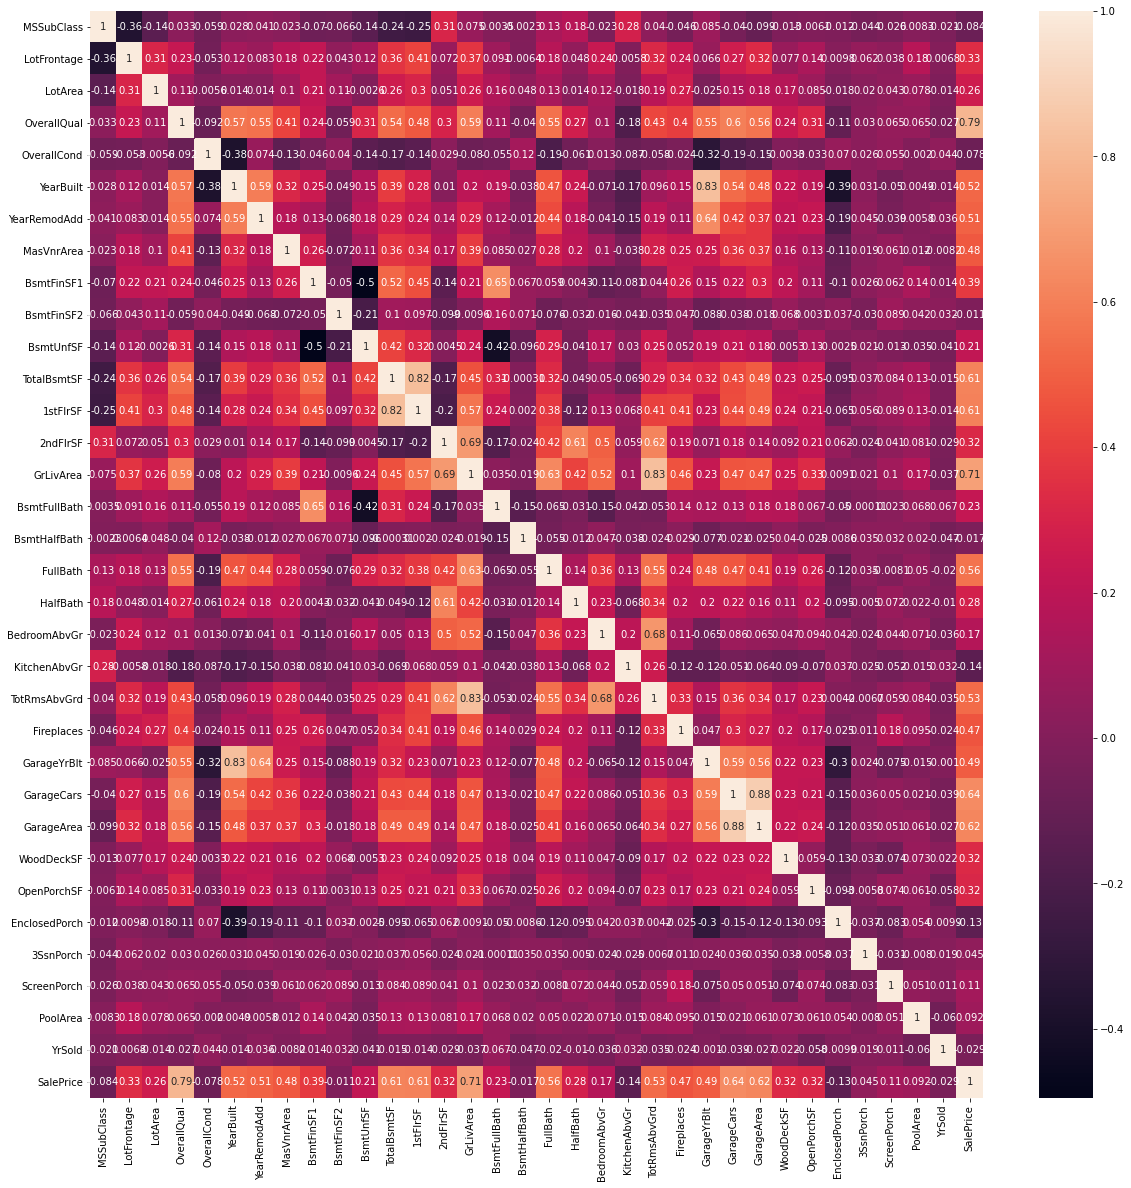

In [57]:
data_correlation = cleaned_data.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(data_correlation, annot=True);

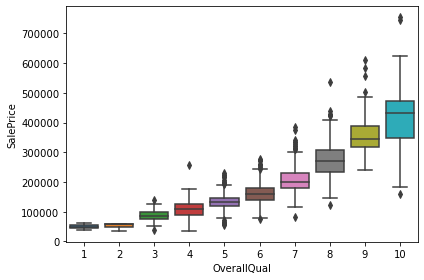

In [42]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = sns.boxplot(x=data['OverallQual'],y=data['SalePrice'])
fig.tight_layout()

In [59]:
X = cleaned_data.drop('SalePrice', 1)
y = cleaned_data['SalePrice']

In [60]:
X_fixed = pd.get_dummies(X, columns=[col for col in X.columns if X[col].dtype == 'O'], drop_first=True)
X_fixed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.30, random_state=18)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fixed, y, test_size=0.2, random_state=18)
  
# training the model on training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = knn.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("kNN model accuracy:", metrics.accuracy_score(y_test, y_pred))
  
# making prediction for out of sample data
sample = [[3, 5, 4, 2], [2, 3, 5, 4]]
preds = knn.predict(sample)
pred_peice = [iris.target_names[p] for p in preds]
print("Predictions:", pred_species)
  
# saving the model
from sklearn.externals import joblib
joblib.dump(knn, 'iris_knn.pkl')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

**Based on those insights, what do you think we can do to predict house prices?**

**Can you think of a model to do it?**

## Train a model on the data

In [5]:
#Your code here

**Based on those results, what do you think about the model? Is it a good model or a bad model?**

**What would be the next step?**